In [14]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [15]:
tensor_transform = transforms.ToTensor()
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=tensor_transform)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [16]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )
        
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 28 * 28),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [17]:
model = AE()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)

In [18]:
epochs = 30
losses = []
for epoch in range(epochs):
    for (image, _) in loader:
        image = image.reshape(-1, 28 * 28)
        
        reconstructed = model(image)
        
        loss = loss_function(reconstructed, image)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/30, Loss: 0.03175906091928482
Epoch 2/30, Loss: 0.026471557095646858
Epoch 3/30, Loss: 0.022887643426656723
Epoch 4/30, Loss: 0.022132202982902527
Epoch 5/30, Loss: 0.022279810160398483
Epoch 6/30, Loss: 0.021422281861305237
Epoch 7/30, Loss: 0.02464400790631771
Epoch 8/30, Loss: 0.018438270315527916
Epoch 9/30, Loss: 0.022223681211471558
Epoch 10/30, Loss: 0.02046481892466545
Epoch 11/30, Loss: 0.021170780062675476
Epoch 12/30, Loss: 0.021235769614577293
Epoch 13/30, Loss: 0.01941385492682457
Epoch 14/30, Loss: 0.019593534991145134
Epoch 15/30, Loss: 0.021453600376844406
Epoch 16/30, Loss: 0.018817758187651634
Epoch 17/30, Loss: 0.020947081968188286
Epoch 18/30, Loss: 0.01938111148774624
Epoch 19/30, Loss: 0.021339036524295807
Epoch 20/30, Loss: 0.01910828799009323
Epoch 21/30, Loss: 0.01971360668540001
Epoch 22/30, Loss: 0.019667018204927444
Epoch 23/30, Loss: 0.016332462430000305
Epoch 24/30, Loss: 0.02353864721953869
Epoch 25/30, Loss: 0.021829016506671906
Epoch 26/30, Loss

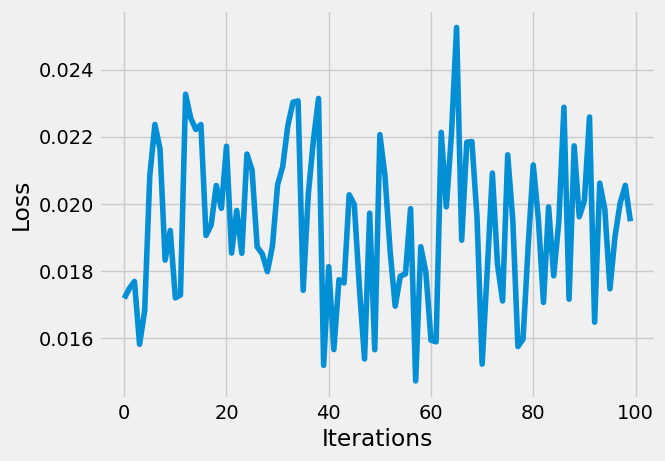

In [19]:
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(losses[-100:])

plt.show()

Reconstructed image 0: min=2.9068492040096316e-06, max=0.9257572889328003
Reconstructed image 1: min=1.3038020085787139e-07, max=0.9144202470779419
Reconstructed image 2: min=6.928172524567344e-08, max=0.9505667686462402
Reconstructed image 3: min=7.641874981345609e-05, max=0.8077481985092163
Reconstructed image 4: min=1.587502652000694e-06, max=0.7621026039123535
Reconstructed image 5: min=1.2307513316045515e-05, max=0.8781206011772156
Reconstructed image 6: min=0.008408487774431705, max=0.5683097243309021
Reconstructed image 7: min=9.689967583881298e-08, max=0.9508638978004456
Reconstructed image 8: min=1.1906874533451628e-05, max=0.7998582720756531
Reconstructed image 9: min=0.00018413783982396126, max=0.6638675928115845


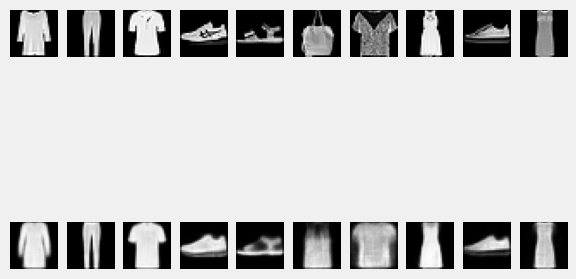

In [20]:
with torch.no_grad():
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(image[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        print(f"Reconstructed image {i}: min={reconstructed[i].min()}, max={reconstructed[i].max()}")

        plt.subplot(2, 10, i + 11)
        plt.imshow(reconstructed[i].detach().numpy().reshape(28, 28), cmap='gray')
        plt.axis('off')

plt.show()